# 1.1 初识数据

In [21]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print('Keys of iris_datset:\n{}'.format(iris_dataset.keys()))

Keys of iris_datset:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
print(iris_dataset['DESCR'][:200]+'\n……')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive
……


In [9]:
print('Target_names:{}'.format(iris_dataset['target_names']))

Target_names:['setosa' 'versicolor' 'virginica']


In [10]:
print('Feature_names:{}'.format(iris_dataset['feature_names']))

Feature_names:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [11]:
print('Type of data:{}'.format(type(iris_dataset['data'])))

Type of data:<class 'numpy.ndarray'>


In [12]:
print('Shape of data:{}'.format(iris_dataset['data'].shape))

Shape of data:(150, 4)


In [13]:
print('First five rows of data:\n{}'.format(iris_dataset['data'][:5]))

First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [14]:
print('Type of target:{}'.format(type(iris_dataset['target'])))

Type of target:<class 'numpy.ndarray'>


In [15]:
print('Shape of target:{}'.format(iris_dataset['target'].shape))

Shape of target:(150,)


In [19]:
print('Target:{}'.format(iris_dataset['target']))

Target:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 1.2 衡量模型是否成功：训练数据与测试数据

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [27]:
print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('X_test shape:{}'.format(X_test.shape))
print('y_test shape:{}'.format(y_test.shape))

X_train shape:(112, 4)
y_train shape:(112,)
X_test shape:(38, 4)
y_test shape:(38,)


# 1.3 要事第一： 观察数据

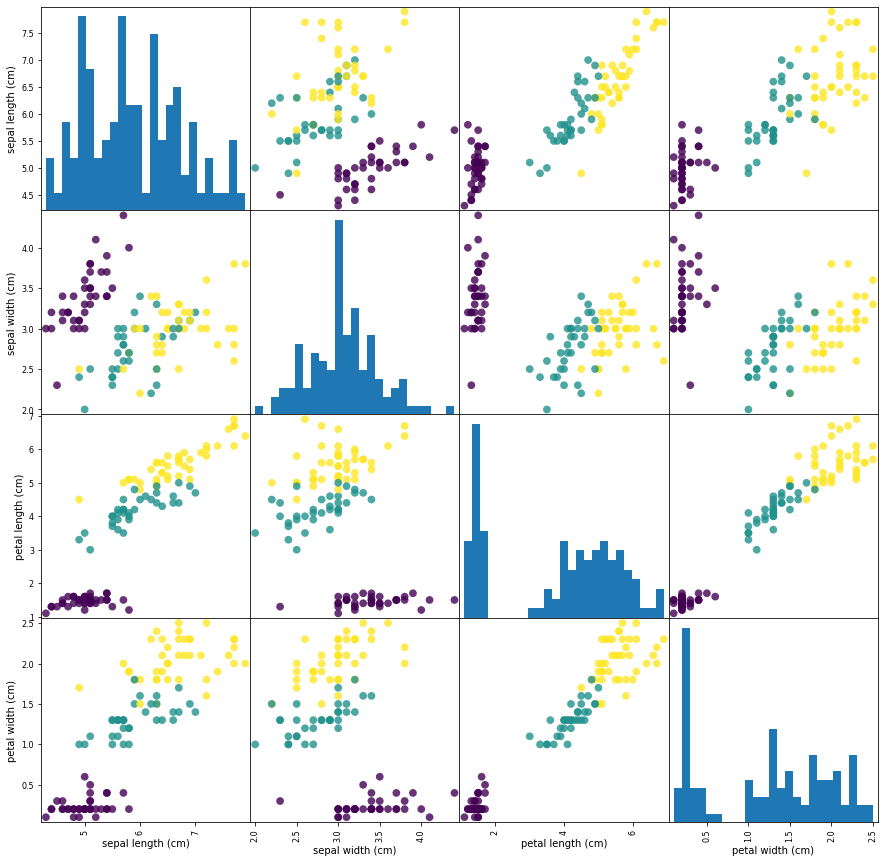

In [42]:
import pandas as pd
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o', 
                        hist_kwds={'bins':25}, s=60, alpha=0.8)


# 1.4 构建第一个模型：k近邻算法

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [36]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# 1.5 做出预测

In [37]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]]) # scikit-learn的输入数据必须为二维度数组
print('X_new.shape:{}'.format(X_new.shape))

X_new.shape:(1, 4)


In [39]:
prediction = knn.predict(X_new)
print('Prediction:{}'.format(prediction))
print('Predicted target name:{}'.format(iris_dataset['target_names'][prediction]))

Prediction:[0]
Predicted target name:['setosa']


# 1.6 评估模型

In [44]:
y_pred = knn.predict(X_test)
print('Test set predictions:\n{}'.format(y_pred))

Test set predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [45]:
print('Test score:{:.2f}'.format(np.mean(y_pred == y_test)))

Test score:0.97


In [46]:
print('Test score:{:.2f}'.format(knn.score(X_test, y_test)))

Test score:0.97
